In [2]:
## 2. cross validation - red wine quality dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)
# to explore cross validation and over fitting we will train a decision tree model on the red wine quality dataset
# (https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd)
# (https://towardsdatascience.com/cross-validation-430d9a5fee22)

In [3]:
# import required modules
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv') # for some reason the dataset won't format? taken from url

# mapping dictionary to remap quality to 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2.0


In [5]:
# split dataset into 1000 samples for training and 599 for testing
# use sample with frac-1 to shuffle the dataframe
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 values are selected for testing
df_test = df.tail(599)

In [6]:
# train decision tree model
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on - these are the features for the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
       ]

#train the model on the provided features and mapped quality from the cell before
clf.fit(df_train[cols], df_train.quality)


DecisionTreeClassifier(max_depth=3)

In [7]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on training data
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

#claculate the accuracy of predictions on the test data
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print('train: ' + str(train_accuracy))
print('test: ' + str(test_accuracy))

# for a max_depth 3 the accuracy is around 0.55, with max_depth 7 the training set goes up to 0.7 but the test set is still around 0.55
# accuracy is a striaghtforward metric, but may not be the best (https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234)

train: 0.529
test: 0.5058430717863105


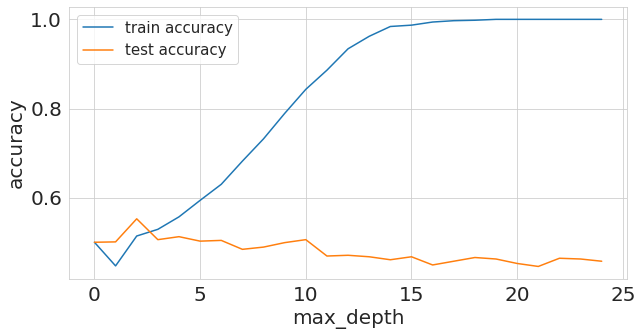

In [8]:
# plotting accuracy against max_depth
# instead of changing the max_depth, lets calculate and plot accuracy for different max_depths

# from sklearn import tree
# from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# global size of label text on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# display plot inline
%matplotlib inline

# initialize lists to store accuracies for training and test data 
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training (this could be fixed outside the loop)
    cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
       ]
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate the training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# create two plots
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
# this is an example of the common 'hold-out' validation where a sections of the dataset is randomly selected 
# and kept for testing. Another method is k-fold (see k_fold.ipynb)